# Statistics and Data Analysis 

#### Kernel Density Estimation

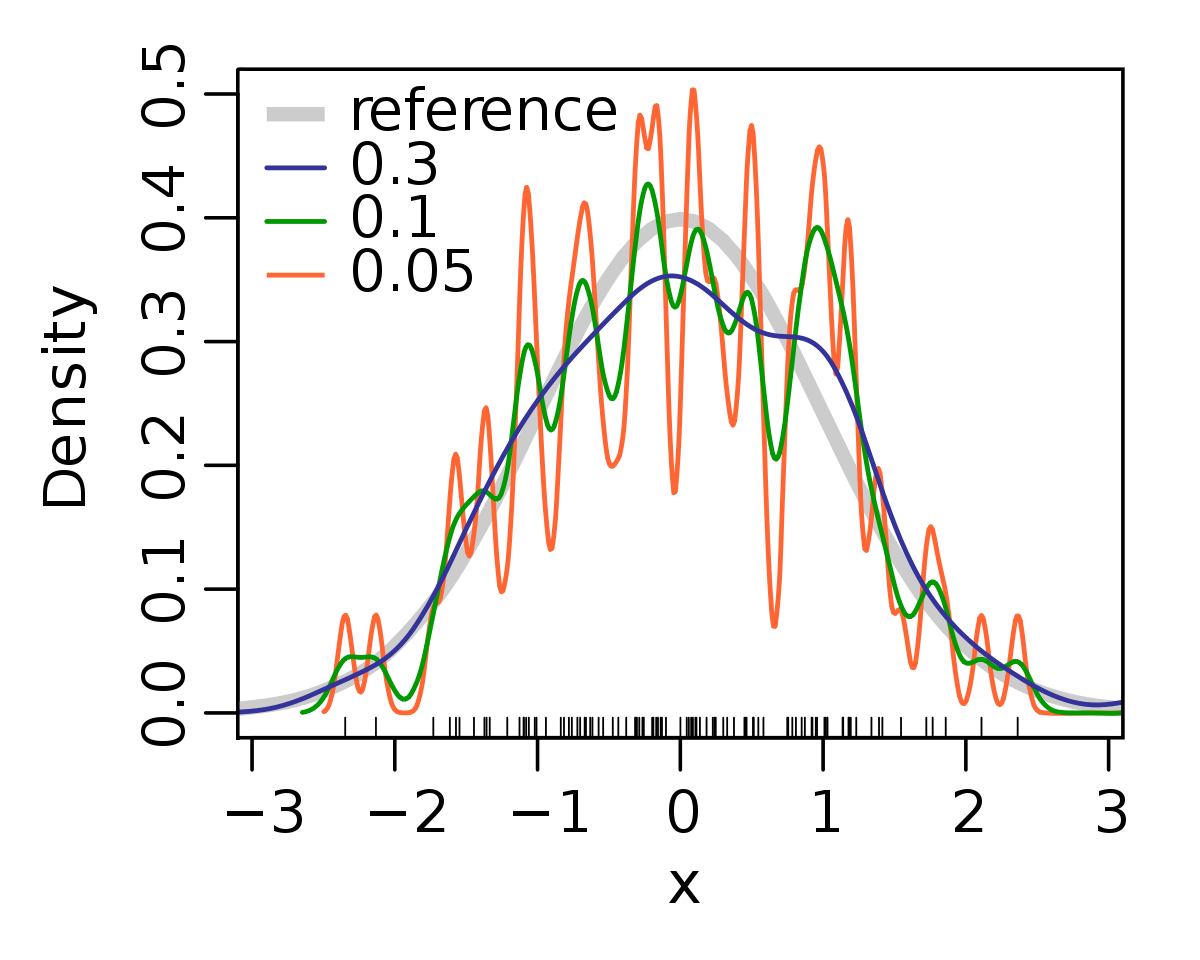

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename=r"C:\Users\ilsup\PycharmProjects\Warehouse\Storage\kde.png",  width=500)

For every point, instead of doing an histogram, we take the sum of the distributions (stacking them) of our chosen kernel distribution (gaussian in the example) built around every point.

So the kernel doesnt tell you the **final shape** of the curve, simply the shape of the theoretical distributions you have to sum up.

$$
{\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},}
$$

The bandwidht $h$ determines how **wide** is the single point distribution, resulting in overfitting if $h$ is very low and in overfitting if it is very high.

```R
# *R functions:* `mean(teenager_fr$X1975)`, `sd()`, `min()`, `max()`, `sum()`

library("utils")
library("tidyverse")

# set working directory
setwd("C:/Users/ilsup/Google Drive/NoViews/Courses/MITx - Data Analysis in Social Sciences/R_scripts")

gender_data <- as_tibble(read.csv("Gender_StatsData.csv"))  # kind of framework as pandas
teenager_fr <- filter(gender_data, Indicator.Code == "SP.ADO.TFRT")  # filter Indicator.Code having code "SP..."
byincomelevel <- filter(teenager_fr,Country.Code%in%c("LIC","MIC","HIC", "WLD"))

# select columns
histdata_twoyears <- select(teenager_fr, Country.Name, Country.Code, Indicator.Name, Indicator.Code, X1960,X2000) 

# Often, %>% is called multiple times to "chain" functions together, which accomplishes the same result as nesting.
```

#### Various 

$f_X(x)$ is an even function if $f_X(x)=f_X(−x)$.


$${\displaystyle {\begin{aligned}\operatorname {cov} (X,a)&=0\\\operatorname {cov} (X,X)&=\operatorname {var} (X)\\\operatorname {cov} (X,Y)&=\operatorname {cov} (Y,X)\\\operatorname {cov} (aX,bY)&=ab\,\operatorname {cov} (X,Y)\\\operatorname {cov} (X+a,Y+b)&=\operatorname {cov} (X,Y)\\\operatorname {cov} (aX+bY,cW+dV)&=ac\,\operatorname {cov} (X,W)+ad\,\operatorname {cov} (X,V)+bc\,\operatorname {cov} (Y,W)+bd\,\operatorname {cov} (Y,V)\end{aligned}}}$$ 

## Experiments

Assumption: **SUTVA**, The potential outcomes for any unit do not vary with the treatments assigned to other units; and, for each unit, there are no different forms or versions of each treatment unit leading to different outcomes.

In an experiment,the Average Treatment Effect (**ATE**) is equal to:

$$\overline{\mathbf{Y}}_T^{obs}-  \overline{\mathbf{Y}}_C^{obs}$$

The relevant test statistic (which under the null is distributed as a normal random variable) is

$$t = \frac{\overline{\mathbf{Y}}_T^{obs}-  \overline{\mathbf{Y}}_C^{obs}}{\sqrt{\hat{\mathbb{V}}_{\text{neyman}}}} \sim N(0,1)$$

where the Neyman variance assumes independence between the populations is 
$$\mathrm{Var}\left(\overline{Y_t^{\mathrm{obs}}}-\overline{Y_c^{\mathrm{obs}}}\right) = \frac{s_c^2}{N_c} + \frac{s_t^2}{N_t} - \frac{s_{ct}^2}N =  \frac{s_c^2}{N_c} + \frac{s_t^2}{N_t} $$

The variance of a difference of two statistically independent variable is the sum of their variance, so the last term is zero ($\frac{s_{ct}^2}N$)

Formula for the sample size:

$$N=\frac{(\Phi^{-1}(1-\beta) + \Phi^{-1}(1-\frac{\alpha}{2}))^2}{\frac{\tau^2}{\sigma^2}\gamma(1-\gamma)}$$



where $\tau$ is the ATE, $\gamma$ is the portion of sample in treatment unit, $1 - \beta$ is the required power of a test, $\alpha$ is the required significance and $\sigma^2$ is the average of the variance of the control and the treatment group in the existing data

### Randomization

Let's take a real example. Imagine you are doing an after school coaching session for a set of students in order to improve their test scores. And in order to compare this treatment effect, naturally, you take the average test scores of those who were given the after school coaching and compare it with the average test scores of those who were not given the coaching.

$E(Y(1) | W=1) - E (Y(0) | W=0)$: this is also represented in the lecture notes. Now, the prof adds and subtracts $E(Y(0) | W=1)$. This is the counterfactual (theoretical) and represents what would've been our observation had we not given the treatment. This is the missing observation (parallel reality). Let's say you give this coaching and observe that the avg. test scores of those who received treatment as 70 and avg. test scores of those who didn't as 80.

$E(Y(1)|W=1) =70 \hspace{0.5cm} E(Y(0) | W=0)=80$ Thus, to compare, 70 minus 80

$$E[Y^{obs}_i | W_i = 1]-E[Y^{obs}_i | W_i = 0]\\
E[Y_i(1) | W_i = 1]-E[Y_i(0) | W_i = 0]\\
E[Y_i(1) | W_i = 1]-E[Y_i(0) | W_i = 1] + E[Y_i(0) | W_i = 1] - E[Y_i(0) | W_i = 0]\\
\text{effect on treated} + \text{selection bias}$$


First two terms are:

$$E[Y_i(1) | W_i = 1]-E[Y_i(0) | W_i = 1]$$

Which represent the **treatment effect on the treated**, while Last two terms are:

$$ E[Y_i(0) | W_i = 1] - E[Y_i(0) | W_i = 0]$$

The **selection bias**, i.e. effect I would have had if I didn't treat who I have actually treated minus The effect I had on who I actually didn't treat. If this expectation is different from zero, it means I did the groups wrong, and the two groups were starting from a different baseline.

Now, let's say you somehow know that those who got the coaching, hadn't they been given the coaching, their avg. test score would've been $50$. Note that this is not observable. But let's assume you know this. This is basically $E(Y(0) | W=1)$. Now adding and subtracting this ($70 - 50 + 50 - 80)$

$70 - 50$: This is the treatment effect on the treated. So, this is comparing solely the effect of treatment on same people. Same people with and without treatment. $50 - 80$ is the selection bias. This is basically saying, had the chosen ones not been given treatment they would've gotten only $50$.


**In a completely randomized experiment, $N_t$ unit are randomly drawn to be in the treatment group, and $N_c$ units are drawn to be in the control group. Then, the probability of assignment does not depend on potential outcomes: $E[Yi(0)|Wi = 1] − E[Yi(0)|Wi = 0] = 0$: selection bias is $0$**

#### Tpes of Randomization
- Completely randomized (aspirin example)
- Stratified randomization : Blocks of some covariate X are created, randomization is done within each block
- Pairwise randomization: Pairs are created, randomization is done within each pair.
- Clustered randomization: Units are not individual, but groups of individuals (e.g. classrooms)
- Encouragement design (scholarship)


## Fisher Exact Test

Like before, we assume that the two populations are independent (knowing how one group doesn’t tell us how the other group did – this is essentially the assumption behind SUTVA)

Fisher is interested in the sharp null hypotesis, i.e. $H_0 : Y_i(0) = Y_i(1)$ for all $i$. The beauty of it is that we can calculate, for any test statistics we are interested in, the probability of the observed value **under the sharp null**. We basically compute **all the possible control and test assignments** and then we compute the probability of seeing a value as high as the one we actually observed

To be clear, let’s say you had Nc people in the control arm and Nt in the treatment arm. This means you
calculate ( Nc
Nc+Nt
) combinations of hypothetical assignments, calculate T for each one, and then compare
how extreme the actual assignment’s Tobs was


```R
# Questions 1 - 4 + Final Exam
#-------------------------------------------------
perms2 <- chooseMatrix(8, 4)  # permutations
dim(perms2)

A <- matrix(c(0.85, 0.99, 1, 0.76, 0.26, 0.45, 0.97 ,0.72), nrow=8, ncol=1, byrow=TRUE)

treatment_avg <- (1/4)*perms2%*%A
control_avg <- (1/4)*(1-perms2)%*%A
test_statistic <- abs(treatment_avg-control_avg)

rownumber <- apply(apply(perms2, 1, function(x) (x == c(1, 1, 1, 1, 0, 0, 0, 0))), 2, sum)
rownumber <- (rownumber == 8)   # select the actually observed row (were all are true and sum = 8)
observed_test <- test_statistic[rownumber == TRUE]
larger_than_observed <- (test_statistic >= observed_test)

# numbers in which the statistic exceeds the value in the observed date
sum(larger_than_observed) / dim(perms2)[1]

df <- data.frame(perms,control_avg,treatment_avg,test_statistic)
```

### Kolmogrov-Smirnoff Test

The Kolmogorov-Smirnov test statistic is defined as (also called $L_\infty$ distance)

$${T _n = \sup_{t \in \mathbb {R}} \sqrt{n} \bigg| F_n(t) - F^0(t) \bigg|}$$

and the Kolmogorov-Smirnov test is

$$\displaystyle \displaystyle \mathbf{1}(T _n>q_\alpha )\qquad \text {where } q_\alpha =q_\alpha (\sup_{t \in [0,1]}\left| \mathbb {B}(t) \right|).$$

By definition, $T_n$ is a pivotal statistic under $H_0$.


<div class="alert alert-info">
<strong>Pivotal distribution</strong>: is a distribution which does not depend on unknown parameters, so you can compute quantiles</div>

Here, $q_\alpha =q_\alpha (\sup_{t \in [0,1]}\left| \mathbb {B}(t) \right|)\,$ is the $(1−α)$ quantile of the supremum of the Brownian bridge as in Donsker's Theorem. It can be computed explicitly as follows:

$$\displaystyle T_n = \sqrt{n}\sup _{t \in \mathbb {R}} \bigg| F_ n(t) - F^0(t) \bigg|$$

In this case, we compare the distribution with with a theoretical one, generally we can also compare two sample distributions (piecewise constant). In that case, the one sided KS statistics is: 

$$D_{nm}^{+} = \max{[F_n(x) - G_m(x)]}$$

The key observation that underlies the KS testing is that, under the null, the distribution of

$$\sqrt{\frac{nm}{n + m}} D_{n, m}$$

does not depend on the unknown distribution in the samples: it has a known distribution (KS) , with associated critical values. Therefore we reject the null of equality if $D_{nm} > C(\alpha)(\frac{nm}{n+m})$,
where $C(\alpha)$ are critical values which we find in tables.

So, the information is needed in order to run a Kolmogrov Smirnov Test is:
- The maximum vertical distance between the two distributions’ CDFs
- The sample size of both distributions, regardless of whether they are the same


But it's putting so little structure on the data
that it has less power.
It is more likely to fail to reject mistakenly.

____

### Linear Regression
#### Assumptions
- identification, i.e. some variability in the $x$ (no vertical line)
    $$\frac{\sum_i (X_i - \bar{X})^2}{n}  > 0$$
    
- No serial correlation, i.e. for every $i \neq j$
    $$E[\epsilon_i \epsilon_j] = 0$$

- Then
    $$E[ϵ_i]=0$$
    
- Homoskedasticity
    $$E[\epsilon^2_i]=\sigma^2$$

Least Square Estimation:

$$\min_{\beta}\sum_{i} (Y_i - \beta_0 - \beta_1 X_i)^{2}$$

We’ll focus on least squares (sometimes called “ordinary least squares,” or OLS). Why? Under the assumptions of
the Classical Linear Regression Model, OLS provides the minimum variance (most efficient) unbiased estimator of
$β_0$ and $β_1$, it is the MLE under normality of errors, and the estimates are consistent and asymptotically normal.



Given a joint probability distribution P for the random pair $(X,Y)$, the regression function of Y with respect to X is defined as

$$\nu (x) = \mathbb E[Y | X = x] = \sum_{\Omega_Y} y \cdot \mathbf{P}(Y = y \; |\; X = x)$$

which tells us the average value of $Y$ given the knowledge that $X=x$. In the case of continuous distributions where we can compute the conditional density $f(y|x)$, the expression on the right hand side is replaced with an integral:

$$\mathbb E[Y | X = x] = \int_{\Omega_Y} y f(y | x) dy$$

In Linear Regression , we will work with the assumption that the regression function<br>
$ν(x):=E[Y|X=x]$ is linear, so that

$$ν(x)=a+bx$$

we will be studying the Least Squares Estimator. It is an estimator $(\hat{a}, \hat{b})$ so that $\hat{Y}=\hat{a}+\hat{b}X$ is "close" (in some distance metric) to the actual $Y$ as often as possible. Assume $Var(X)≠0$. The **theoretical linear (least squares) regression** of $Y$ on $X$ prescribes that we find a pair of real numbers $a$ and $b$ that **minimize** $E[(Y−a−bX)^2]$, over all possible choices of the pair $(a,b)$; the $a$ and $b$ that minimize the squared error are:

$$a = \mathbb E[Y] - \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)} \mathbb E[X], \qquad b = \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)}$$

$$V\left [\hat a \right]= \frac{\sigma^2 \bar{x}}{n \hat\sigma_x^2} + \frac{\sigma^2}{n} \hspace{0.5cm} V\left [\hat b \right]= \frac{\sigma^2}{n \hat\sigma_x^2}\hspace{0.5cm} \text{where} \hspace{0.5cm}\hat\sigma_x^2= \frac{1}{n}  (\sum x - \bar x)^2$$

$$\text{Cov}(a, b) = - \frac{\sigma^2 \bar{x}}{n \hat\sigma_x^2}$$


$\sigma^2$ is the variance of the error. In **empirical linear regression**, we are given a collection of points ${(x_i, y_i) }_{i=1}^{n}$. The goal is to fit a linear model $Y=a+bX+ε$ by computing the Least Squares Estimator, which minimizes the loss function

$$\frac{1}{n} \sum_{i=1}^ n (y_i - (a + bx_i))^2.$$

Using the same technique as in the problems on theoretical linear regression, one obtains the solution

$$\hat{a} = \overline{y} - \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \overline{x} \qquad \hat{b} = \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2}.$$

In this particular case, this is precisely what one obtains by taking the least squares solution for the theoretical linear regression problem and replacing each term with their empirical counterparts according to the plug-in principle.

> The **rank** of a matrix is defined as (a) the maximum number of linearly independent column vectors in the matrix or (b) the maximum number of linearly independent row vectors in the matrix. Both definitions are equivalent. For an r x c matrix, If r is less than c, then the maximum rank of the matrix is r.

The model is homoscedastic if $ε_1,...,ε_n$ are i.i.d.

As mentioned during our discussion of least squares estimators, one of the favourable properties of OLS is that the estimators are unbiased. This means that $E[\hat \beta_0]= \beta_0$  and $E[\hat \beta_1] = \beta_1$.

If we assume that the**errors are i.i.d. normal, $\hat{\beta_0}$ and $\hat{\beta_1}$ then are normally distributed. But when we substitute in for $\sigma^2$, the standardized version of $\beta$ now has a $t$ distribution, not a normal distribution any more.**

**Unbiased estimator of error varince ($\sigma^2$):** We use the estimator with $n−2$ in the denominator because it is unbiased in the linear model when we are estimating two parameters  $β_0$  and  $β_1$ . Recall that when we were estimating only one parameter, the estimator with  n−1  in the denominator would return an unbiased estimator.

$$\frac{1}{n-2} \sum \hat{\epsilon_i}^{2}$$

**Analysis Of Variance**:  $SSR$ over $SST$

$$SST = \sum_i (Y_i - \hat{Y})^2$$

$$SSR = \sum \hat{\epsilon_i}^{2}$$

Why the ratio is between zero and one? Because, by construction, the SSR is smallest possible error we can get; 0 <= SSR/SST <= 1 Why? Because both of these values are non negative, by construction, and the fact that the regression line is the “least squares” line ensures that SSR <= SST.

The expression above has an F-distribution under the null hypothesis, when there are  k  coefficients. test that our coefficients are all zero

$$\frac{n-k}{k-1}\frac{R^{2}}{1-R^{2}}$$

Which of the following are examples of how we can adapt the linear model to model non-linear relationships? (Select any that apply.)


We can transform  X  and  Y  using nonlinear functions and perform linear regression on these transformed variables.
We can create interaction variables by multiplying together regressors.

The statement is true and we can show this by the closed form solution  β^0 , which is $\hat{\beta}_{0} = \overline{y} - \hat{\beta}_{1} \overline{x}.$.  In general, the predicted value of the model is given by  β^0+β^1x.  When  x=x¯¯¯  then we have that this is  β^0+β^1x¯¯¯.  Then from the closed form expression for  β^0 , we have that:

$$\hat{\beta}_{0}+ \hat{\beta}_{1} \overline{x}=\overline{y}-\hat{\beta}_{1} \overline{x} +  \hat{\beta}_{1} \overline{x}= \overline{y}$$

### Multivariate

Assumptions:

- $E[ϵ]=0$
- The number of observations is greater than the number of regressors
- The errors are uncorrelated across observations
- The regressors are linearly independent

These are all assumptions of the Multivariate Linear Model except  Cov(Y,ϵ)=0 , which is not an assumption because we are not making claims about causality.

$$\hat \beta = (X^T X)^{-1}X^TY \hspace{0.5cm} \text{if} \hspace{0.5cm} X^TX \hspace{0.5cm} \text{is invertible}$$

The distribution of the errors only affects the distribution of  $\hat{β}$. However, $\hat{β}$ is an unbiased estimator irrespective of the distribution of the errors. This assumption is useful for inference purposes (recall the discussion on hypothesis testing, you need to make an assumption about the underlying distribution so you have something to compare your estimator to!).


### F-test

Variance estimation:-


$$\hat{\sigma}^{2} = \frac{\hat{\epsilon}^{T}\hat{\epsilon}}{(n-k)}$$

Where  ϵ^Tϵ^  denotes the residuals, and  σ^2  denotes the residual variance (i.e the variance of that’s not explained by your regressors.) So if your additional regressor has no explanatory power, adding a regressor will just increase your degrees of freedom  k , and leave the residual variance fixed, thereby increasing your variance estimator. However, if your regressor explains some of the variation in your model, then adding it will decrease your variance

$$H_0: R\beta = c$$
$$H_1: R\beta \neq c$$

where $R$ is a $r \times (k+1)$ matrix of restrictions.



We have a super intuitive and cool way to test these
hypotheses. (First, think of the null as describing a set of
restrictions on the model.)
1. We estimate the unrestricted model.
2. We impose the restrictions of the null and estimate
that model.
3. We compare the goodness of fit of the models. If the restrictions don’t really affect the fit of the model much, then the null is probably true or close to true, so we do not want to reject it. If the restrictions really bind, then
we do want to reject the null.

Estimating the unrestricted model should be simple just run the regression. But how do we estimate the restricted
model? If the restriction is that certain $\beta = 0$, then leave the regressors corresponding to those $\beta$ out of the restricted model.

If the restriction is that, say, two $\beta$ are equal, create a new regressor, which is the sum of the regressors corresponding to those $\beta$ s and include that sum in the restricted model in place of the original regressors.

This is an F test. (We’ve mentioned a special case of the F test before. This is a more general formulation.)

$$T = \frac{\frac{SSR_R - SSR_U}{r}}{\frac{SSR_U}{n -(k+1)}}$$

the variance explained by the parameters in the model (sum of squares of regression, SSR) and the residual or unexplained variance (sum of squares of error, SSE). You can see this better if we get the ANOVA table for the model via
$T ~ F_{r,n-(k+1)}$ under the null and we reject the null for large values of the test statistic.




$H_0:\beta_j>c$  is a one-sided hypothesis, and therefore you need a t-test. And in this case, the F-test and t-test are not equivalent.


The default F-stat reported by R tests the null hypothesis that all your coefficients, with the exception of the intercept are equal to 0. Recall that the set of coefficients on your regressors does not include the intercept, so the hypothesis that all of your coefficients are equal to 0 is false.

The F-test statistic computed by R is testing whether each of the coefficients on your regressors is equal to 0, whereas the reported t-test statistic is testing that the specific coefficient is equal to 0. Therefore, if you only have one regressor, these will be equivalent. In particular, the reported F-test statistic will be the square of the reported t-test statistic.



Restricted model vs Unrestriced model: 

where SSR is the residual sum of squares of model. Under the null hypothesis that unrestricted model does not provide a significantly better fit than model 1, F will have an F distribution, with $(r, n−(k+1))$ degrees of freedom. The null hypothesis is rejected if the F calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g. 0.05). The F-test is a Wald test.


```R
houses <- read.csv('data_House_Prices_and_Crime_1.csv')

ols <- lm(index_nsa ~ Homicides + Robberies + Assaults, data=houses)

confint(ols, 'Homicides', level=0.95)  # confidence interval

houses$ass_minus_homi <- houses$Assaults - houses$Homicides
houses$rob_minus_homi <- houses$Robberies - houses$Homicides
restricted <- lm(index_nsa ~ ass_minus_homi + rob_minus_homi, data = houses)
summary(restricted)

anova_unrest <- anova(ols)
anova_rest <- anova(restricted)
r = 1

SSRr = anova_rest$`Sum Sq`[3]
SSRu = anova_unrest$`Sum Sq`[4]

statistic_test <- ((SSRr-SSRu/r)/(SSRu/anova_unrest$Df[4]))
statistic_test

pvalue <- df(statistic_test, 1, anova_unrest$Df[4])  # df= F distribution
pvalue
```

### Dummy Regression

$$Y_i = \alpha + D_i + \epsilon_i$$

$D_i$ is a dummy variable , or an indicator variable, if it takes the value 1 if the observation is in group A, and 0 if in group B.


#### Average Treatment Effect (ATE)

Consider

$$Y_i = \beta_0 + \beta_i D_i + \epsilon$$

where $D_i$ is a dummy. $\beta= \overline{Y_A} - \overline{Y_B}$, where A is the group with dummy $1$ and B is the group with dummy $0$. The variance of this can be considered to be similar to the variance in the Neyman case.

#### Neyman standard errors

$$\mathrm{Var}\left(\overline{Y_t^{\mathrm{obs}}}-\overline{Y_c^{\mathrm{obs}}}\right) = \frac{s_c^2}{N_c} + \frac{s_t^2}{N_t} - \frac{s_{ct}^2}N$$

Recall that the Neyman standard errors adjust for the sample of each of the two groups. Whereas, OLS standard errors only take into account the size of the overall sample. Furthermore, the bias disappears if your samples are large enough (so B is not true). However, if you have a very unbalanced sample (i.e much fewer females than males, then  σNeyman≠σOLS).

#### Categoriacal variables

The meaning of the betas is the value of the treatment of the variable against the omitted one (we have to omit one to **avoid collinearity**)


#### Dummy + $x$
With other variables in the regression:

$$Y_i = \beta_0 + \beta_i D_i + \beta_2 X_i  \epsilon$$

In that case $\beta_2$ is the difference in intercept between group A and group B. This is the most frequent way that RCT are analyzed: the matrix $X$ are *control variables*: **things that did not affect the assignment but may have been different at baseline**. 

#### Two Dummies

> E.g. Compare wages of Woman ($1$) vs men ($0$) where the dummy differentiates between man and woman. That regression answer to the question: is it true that, even after controlling for all the $X$s, the "baseline" is still higher/lower for woman? 


I found the following useful when thinking about this. The model is  $y (D, M) = \alpha + \beta D + \gamma M + \delta DM$, where

$$D = \cases{0 : {\rm control} \\ 1 : {\rm treatment} }$$

and

$$M = \cases{0 : {\rm female} \\ 1 : {\rm male} }$$


Substituting combinations of values of  D  and  M , we arrive at the following four combinations:

$$y (0, 0) = y ({\rm control}, {\rm female}) = \alpha\\
y (0, 1) = y ({\rm control}, {\rm male}) = \alpha + \gamma\\
y (1, 0) = y ({\rm treatment}, {\rm female}) = \alpha + \beta\\
y (1, 1) = y ({\rm treatment}, {\rm male}) = \alpha + \beta + \gamma + \delta$$


Taking a bunch of differences yields:

- $y(1,0)−y(0,0)=y(treatment,female)−y(control,female)=α+β−α=β$; this is the average treatment effect for females.
- $y(0,1)−y(0,0)=y(control,male)−y(control,female)=α+γ−α=γ$ ; this is the average difference between males and females in the control group.
- $y(1,1)−y(0,1)=y(treatment,male)−y(control,male)=α+β+γ+δ−α−γ=β+δ$ ; this is the average treatment effect for males.

Subtracting the first expression above from the third one gives

$$y (1, 1) - y (0, 1) - [y (1, 0) - y (0, 0)] = \beta + \delta - \beta = \delta$$ 

**This is the difference in the average treatment effects for males and females, accounting for the different baseline**

**T-statistic**: you can construct the t-statistic by taking the ratio of the difference in means (or the estimated coefficient)  to the standard error.

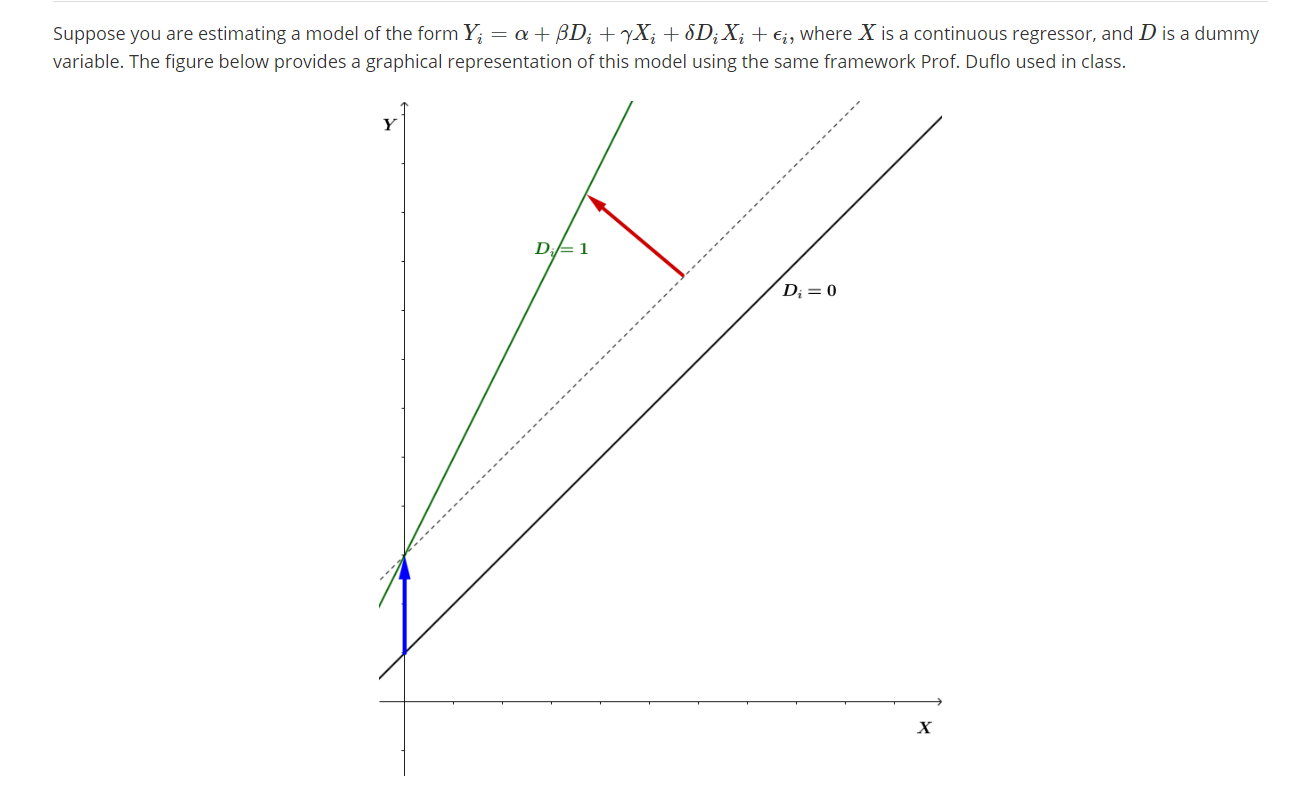

In [2]:
from IPython.display import Image
from IPython.core.display import HTML

Image(filename=r"C:\Users\ilsup\PycharmProjects\Warehouse\Storage\regression.png",  width=700)

___

Non Linearities in regression:

- Take log of X
- Interact the X, such as the slope of one depends on the level of another.
- Potentially lots of variables and their transformations

Consider:

$$log (Y_i) = \beta_0 + \beta_1 S_i + \beta_2 log(P_i)  + \epsilon_i$$

where $Y_i$ denotes the mean hourly wage for individual  i, $S_i$ denotes the number of years of education individual $i$  has completed, and $P_i$ denotes mother's education. 

When your outcome is in logs and your regressor is in logs, the coefficients represent elasticities: your coefficients measure the  %  change in your outcome as a result of a  1%  change in your regressor. If your outcome is in logs, but your regressor is not, the coefficient represents the  %  in your outcome resulting from a unit increase in your regressor. So in this example, since the model includes  $S_i$  and  $\log(P_i)$ , each additional year of education leads to a $(\beta_1 \times 100)\%$  change in wages and a  1%  change in mother's education leads to a $\beta_2\%$  change in wages. $\beta_2$  is also the elasticity of wage with respect to mother's education. So:

- Each additional year of education leads to a $(\beta_1 \times 100)\%$ change in wages
- $\beta_2$  is the elasticity of wage with respect to mother's education
- A  $1\%$  change in mother's education leads to a $\beta_2 \%$  change in wages

___

#### Discontinuities
In a parametric RD you center your variables and fit polynomial functions of your running variable on both sides of the cutoff to help distinguish discontinuities from nonlinearities. You can even allow for the coefficients to be different on both sides of the cutoff. These are things you can do in the simple parametric RD framework. To justify your assumption, you can look at whether other variables vary discontinuously at the thresh-hold. In nonparametric RDs, usually local linear regression is used.

Example:
$$Yi = \beta_0 + \beta_1 D_{ai} + \beta_2 a_i + \epsilon_i$$

where $Y_i$ is road fatalities, and $D_{ai}$ is dummy for being allowed to drink and $a$ is age

#### Omitted Variable
Variables that are correlated with your regressor are only a problem if they also affect your outcome. (Ex. If you are interested in the effect of years of schooling on your wages, and you fail to control for ability- it could be that schooling doesn't affect earnings, but earnings are partly determined by ability. Since high ability individuals are more likely to stay in school, if you don't control for ability, you might overstate the effect of schooling. However, if ability doesn't affect earnings, then this would not have an impact on your estimates.

Omitted Variable Bias. Correct model:

$$Yi = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \epsilon_i$$

Estimated model:

$$Yi = \alpha_0 + \alpha_1 X_{1i}+ \epsilon_i$$

Define Ancillary (or Auxillary) regression as:

$$X_{2i} = \delta_0 + \delta_1 X_{1i} + \theta_i$$


$$\text{OVB} = \hat{\alpha_1} - \beta_1 = \delta_1 \beta_2$$

So in other words, the omitted variable bias, i.e. the estimated coefficient of the "wrong" model minus the estimated coefficient of the right "full" modell depends, in this very simple way, of the influence of the omitted variable
on the outcome and the influence of the $x_1$ on $x_2$.

Proof:

> It is worth spending some time with this formula because it is
going to stay with you for your entire life as a data scientist!
Remember OLS bivariate formula: $$\alpha_1 = \frac{Cov(Y_i ;X_{1i} )}{V(X_{1i})}$$ substituting for $Y_i$ we get:<br><br> $$\frac{Cov(\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \epsilon_i ; X_{1i})}{V(X_{1i})}=
\frac{\beta_1 V(X_{1i}) + \beta_2Cov(X_{2i} ;X_{1i}) + Cov(\epsilon_i ; X_{1i})}{V(X_{1i})}
= \beta_1 + \delta_1\beta_2$$

___

### Endogeneity

There is an endogeneity problem where the coefficient will measure the effect **of the regressor on the outcome variable AND the effect of the outcome variable on the regressor** (feedback loop can cause this problem).

Endogeneity occurs when a predictor variable (X) in a regression model is correlated with the error term. This can be caused by:

- simultaneity ($Y$ and $X$ mutually affect each other)
- OVB (there is a $W$ that affects both $X$ and $Y$)

**We should make an example of another variable influencing $X$ (education) but not $Y$ (earnings): INSTRUMENTAL VARIABLE $Z$**; the only relation of the newly added variable should be with the independent variable (e.g. **scholarship**). From the example, the estimated effect of going to secondary school on cognitive scores is equal to the effect of the scholarship on cognitive scores divided by the effect of the scholarship on going to secondary school. Your estimated effect is given by

$$\hat{\beta} = \frac{E[Y_i│Z_i=1]-E[Y_i│Z_i=0]}{E[A_i│Z_i=1]-E[A_i│Z_i=0]}$$


(**Wald's estimate**, i.e. The reduced form relationship over the first stage relationship) where  $Y_i$ denotes cognitive scores, $Z_i$ is a dummy variable equal to $1$ if assigned to the treatment group and $0$ otherwise, and $A_i$ denotes whether individual $i$ goes to secondary school. If the first stage is $0$, both your estimate and its standard errors would blow up to infinity.


Three conditions make $Z$ a good instrument
1. It affects $A_i$ : $E[A_{i} | Z_i = 1] - E[A_i | Z_i = 0]$
2. It is randomly assigned, or as good as randomly assigned, so that $E[Y_i | Z_i = 1] - E[Y_i | Z_i = 0]$ can be interpreted as the causal effect of $Z$ on $Y$ (when we use RCT as an instrument this is guaranteed, otherwise it needs to be checked)
3. **It has no direct effect on $Y$ (exclusion restriction). This may or may not be true, has to be argued on a case by case basis, and cannot be tested.**


A good instrument needs to:
- Be correlated with your regressor of interest
- Randomly assigned or as good as randomly assigned
- Have no direct effect on the outcome variable of interest.

If the instrument is not correlated with the regressor, then it will not produce variation in the regressor. If the instrument is not randomly assigned, then the instrument may not produce only exogenous variation in the regressor. If the instrument directly affected the outcome variable, then we could not distinguish between the effect from the variation in the regressor and the direct effect. Positive correlation with the outcome variable is irrelevant.

___

### Two Stage Least Squares

Normally, in an instrumental variable setting **with dummies**, we could calculate the ratio of the effect of the instrument $Z$ on $Y$ over the effect of the intervening variable $A$ over $Y$. If the iinstrument is not a dummy, we neeed to introduce a Two stage least squares (2SLS), which is a two step procedure. Of course, the same set-up is valid also in the dummy case. What is the regressor in the second stage?

- First stage: $$A_i = \pi_0 + \pi_1 Z_i + v_i$$
- Reduced Form: $$Y_i = \gamma_0 + \gamma_1 Z_i + w_i$$
- Two stage least square: Run the first stage, and take the fitted values of $\hat{A_i}$
- Then, in the second stage, run: $$Y_i = \alpha + \beta \hat{A_i} + \epsilon_i$$

The Z matrix must contain all the exogenous regressors that are part of your first stage, i.e. the instrumental variables and the control variables.



$$\hat{\beta} = \frac{\text{Cov}[\hat{A_i}, Y_i]}{\text{Var}[\hat{A_i}]} = \frac{\text{Cov}[\pi_0 + \pi_1 Z_i, Y_i]}{\text{Var}[\pi_0 + \pi_1 Z_i]} = \frac{\pi_1 \text{Cov}[Z_i, Y_i]}{\pi_1^2 \text{Var}[Z_i]} = \frac{\gamma_1}{\pi_1}$$

[**Insturmental Variable vs Control Variable**](https://www.sciencedirect.com/topics/economics-econometrics-and-finance/instrumental-variables#:~:text=Control%20Variable%20in%20Research&text=Unlike%20an%20observed%20control%20variable,selection%20into%20the%20treatment%20condition): control has a direct effect on the $Y$, instrumental doesn't, but have an indirect effect through the correlation with one of the variables.